In [83]:
# voir https://makina-corpus.com/blog/metier/2019/python-carto

import pandas as pd
from opensky_api import OpenSkyApi
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
import geopandas
import requests

In [2]:
df_day = pd.read_json("data/states_2019-03-25-04.json")


In [3]:
df_day.head()

,alert,baroaltitude,callsign,geoaltitude,heading,icao24,lastcontact,lastposupdate,lat,lon,onground,spi,squawk,time,velocity,vertrate
0,False,11254.74,EWG1113,11239.50,131.912349,44ccca,1.553486e+09,1.553486e+09,52.910751,-2.665024,False,False,513.0,1553486400,263.385782,-3.25120
1,False,11887.20,KLM254,11818.62,108.921673,48436b,1.553486e+09,1.553486e+09,54.561722,-4.861693,False,False,6311.0,1553486400,268.108748,0.00000
2,False,10668.00,DAL86,10706.10,106.295685,a13af4,1.553486e+09,1.553486e+09,54.171982,-4.998779,False,False,520.0,1553486400,265.844132,-0.32512
3,False,11605.26,AAL44,NaN,147.238810,a4553b,1.553486e+09,1.553486e+09,52.917046,-2.074690,False,False,6303.0,1553486400,272.842106,-0.65024
4,False,11887.20,ACA878,11902.44,124.143587,c051e4,1.553486e+09,1.553486e+09,53.827377,-4.538217,False,False,511.0,1553486400,270.389143,-0.32512


# Aircraft database

https://opensky-network.org/datasets/metadata/


In [84]:
df_aircraft = pd.read_csv("data/aircraftDatabase.csv", low_memory=False)
df_aircraft.head()

,icao24,registration,manufacturericao,manufacturername,model,typecode,serialnumber,linenumber,icaoaircrafttype,operator,...,status,built,firstflightdate,seatconfiguration,engines,modes,adsb,acars,notes,categoryDescription
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
1,aa3487,N757F,NaN,Raytheon Aircraft Company,A36,NaN,E-3121,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN
2,ae267b,6533,VOUGHT,Aerospatiale,MH-65C Dolphin,AS65,6182,NaN,H2T,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,No ADS-B Emitter Category Information
3,a4fa61,N42MH,NaN,Piper,PA-31-350,NaN,31-7852015,NaN,NaN,NaN,...,NaN,1977-01-01,NaN,NaN,LYCOMING TI0-540 SER,False,False,False,NaN,NaN
4,c04101,C-FYQA,NaN,Champion Aircraft Corporation,7GCA (Champion),NaN,420,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,False,False,False,NaN,NaN


# Airport code to Airport name 


In [85]:
df1 = pd.read_csv("data/airports.dat", header= None)
df1.columns = ["id", "name", "city", "country", "iata", "icao", "latitude", "longitude", "altitude", "timezone", "dst", "databasetimezone","type ","source "]
df1.head()

,id,name,city,country,iata,icao,latitude,longitude,altitude,timezone,dst,databasetimezone,type,source
0,1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
1,2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
3,4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports


In [86]:
df_airport = df1.loc[:,['name','city','country','iata','icao']]
#df_airport.columns=['Name','City','Country','IATA','ICAO']
df_airport.head()

,name,city,country,iata,icao
0,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA
1,Madang Airport,Madang,Papua New Guinea,MAG,AYMD
2,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH
3,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ
4,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY


In [168]:
df_airport.loc[df_airport['city'] == 'Paris']

,name,city,country,iata,icao
1344,Paris-Le Bourget Airport,Paris,France,LBG,LFPB
1346,Charles de Gaulle International Airport,Paris,France,CDG,LFPG
1350,Paris-Orly Airport,Paris,France,ORY,LFPO
6794,Cox Field,Paris,United States,PRX,KPRX


Maintenant nous avons le code de l'aéroport pour Charles de Gaulle LFPG et nous pourrons après utiliser ce tableau pour convertir le code aéroport en son nom.

# Departure Airport

In [60]:
import time
from datetime import datetime, timedelta
tnow = int(time.time())-3600*24
print(tnow)
print(datetime.fromtimestamp(tnow).strftime("%d/%m/%Y %H:%M"))
t0 = tnow-3600*2
print(t0)
print(datetime.fromtimestamp(t0).strftime("%d/%m/%Y %H:%M"))

1553962951
30/03/2019 17:22
1553955751
30/03/2019 15:22


In [61]:
url="https://opensky-network.org/api/flights/all?begin="+str(t0)+"&end="+str(tnow)

In [62]:
data = requests.get(url,auth=('rhizome23','Mirage90700?')).json()
df_data = pd.DataFrame.from_dict(data, orient='columns')
#print(df_data.head())
print( list(df_data.columns.values))
print(df_data.shape)
#df_data['estDepartureAirport'].value_counts()
#df_data.groupby('estDepartureAirport').count()

['arrivalAirportCandidatesCount', 'callsign', 'departureAirportCandidatesCount', 'estArrivalAirport', 'estArrivalAirportHorizDistance', 'estArrivalAirportVertDistance', 'estDepartureAirport', 'estDepartureAirportHorizDistance', 'estDepartureAirportVertDistance', 'firstSeen', 'icao24', 'lastSeen']
(3068, 12)


In [63]:
url="https://opensky-network.org/api/flights/departure?airport=LFPG&begin="+str(t0)+"&end="+str(tnow)

In [64]:
data = requests.get(url).json()
df_data = pd.DataFrame.from_dict(data, orient='columns')
df_data.head()
print( list(df_data.columns.values))

['arrivalAirportCandidatesCount', 'callsign', 'departureAirportCandidatesCount', 'estArrivalAirport', 'estArrivalAirportHorizDistance', 'estArrivalAirportVertDistance', 'estDepartureAirport', 'estDepartureAirportHorizDistance', 'estDepartureAirportVertDistance', 'firstSeen', 'icao24', 'lastSeen']


In [66]:
df_departures = df_data.loc[:,["firstSeen",'callsign','icao24',"estDepartureAirport","estArrivalAirport"]]
df_departures['firstSeen'] = df_departures['firstSeen'].apply(lambda x: datetime.fromtimestamp(x).strftime("%H:%M - %d/%m/%Y"))
#df_departures['estArrivalAirportHorizDistance'] = df_departures['estArrivalAirportHorizDistance'].apply(lambda x: x/1000)
s = df_airport.set_index('icao')['name']
df_departures["estDepartureAirport"] = df_departures["estDepartureAirport"].replace(s)
df_departures["estArrivalAirport"] = df_departures["estArrivalAirport"].replace(s)
a = df_aircraft.set_index('icao24')['model']
#df_departures["icao24"] = df_departures["icao24"].replace(a)


In [67]:
df_departures.head(10)

,firstSeen,callsign,icao24,estDepartureAirport,estArrivalAirport
0,17:20 - 30/03/2019,EIN527,4ca15d,Charles de Gaulle International Airport,Dublin Airport
1,17:15 - 30/03/2019,EJU3775,440046,Charles de Gaulle International Airport,None
2,17:15 - 30/03/2019,AUA22W,440669,Charles de Gaulle International Airport,Vienna International Airport
3,17:14 - 30/03/2019,EZY93VH,40631c,Charles de Gaulle International Airport,London Gatwick Airport
4,17:14 - 30/03/2019,AZA313,4ca9e2,Charles de Gaulle International Airport,Milano Linate Airport
5,17:12 - 30/03/2019,AFR12WX,392aed,Charles de Gaulle International Airport,Barcelona International Airport
6,17:10 - 30/03/2019,AFR1404,392af8,Charles de Gaulle International Airport,Leonardo da Vinci–Fiumicino Airport
7,17:01 - 30/03/2019,EJU3855,44083b,Charles de Gaulle International Airport,Budapest Liszt Ferenc International Airport
8,17:00 - 30/03/2019,AFR71WM,3950c5,Charles de Gaulle International Airport,None
9,16:59 - 30/03/2019,EJU3957,4402ae,Charles de Gaulle International Airport,None


# Arrivals Airport

Procurons nous l'instant t maintenant et j-1 en tant absolu Unix Time Stamp

In [ ]:
import time
from datetime import datetime, timedelta
tnow = int(time.time())-3600*24  # t now à j-1
print(tnow)
print(datetime.fromtimestamp(tnow).strftime("%d/%m/%Y %H:%M"))
t0 = tnow-3600*5
print(datetime.fromtimestamp(t0).strftime("%d/%m/%Y %H:%M"))

In [ ]:
url="https://opensky-network.org/api/flights/arrival?airport=LFPG&begin="+str(t0)+"&end="+str(tnow)

In [15]:
data = requests.get(url).json()
dataframe1 = pd.DataFrame.from_dict(data, orient='columns')
dataframe1.head()
print( list(dataframe1.columns.values))

['arrivalAirportCandidatesCount', 'callsign', 'departureAirportCandidatesCount', 'estArrivalAirport', 'estArrivalAirportHorizDistance', 'estArrivalAirportVertDistance', 'estDepartureAirport', 'estDepartureAirportHorizDistance', 'estDepartureAirportVertDistance', 'firstSeen', 'icao24', 'lastSeen']


In [16]:
df_arrivals = dataframe1.loc[:,['callsign',"estArrivalAirport","estDepartureAirport","firstSeen","lastSeen"]]
df_arrivals= df_arrivals.rename(columns ={'estArrivalAirport':'ArrivalAirport','estDepartureAirport':'DepartureAirport'})
s = df_airport.set_index('ICAO')['Name']
df_arrivals["DepartureAirport"] = df_arrivals["DepartureAirport"].replace(s)
df_arrivals["ArrivalAirport"] = df_arrivals["ArrivalAirport"].replace(s)
df_arrivals['FlighTimeSec'] = df_arrivals['lastSeen']- df_arrivals['firstSeen']
df_arrivals['FlighTime'] = df_arrivals['FlighTimeSec'].apply(lambda x: timedelta(seconds=x))
df_arrivals = df_arrivals.drop('FlighTimeSec', 1)

In [17]:
df_arrivals['firstSeen'] = df_arrivals['firstSeen'].apply(lambda x: datetime.fromtimestamp(x).strftime("%H:%M - %d/%m/%Y"))
df_arrivals['lastSeen'] = df_arrivals['lastSeen'].apply(lambda x: datetime.fromtimestamp(x).strftime("%H:%M - %d/%m/%Y"))

In [18]:
df_arrivals.head(10)

,callsign,ArrivalAirport,DepartureAirport,firstSeen,lastSeen,FlighTime
0,FDX5233,Charles de Gaulle International Airport,Malpensa International Airport,19:18 - 26/03/2019,21:01 - 26/03/2019,01:43:03
1,AFR1655,Charles de Gaulle International Airport,Houari Boumediene Airport,18:34 - 26/03/2019,20:58 - 26/03/2019,02:23:38
2,EZY16TZ,Charles de Gaulle International Airport,Alverca Air Base,18:45 - 26/03/2019,20:56 - 26/03/2019,02:11:11
3,ELY325,Charles de Gaulle International Airport,None,17:14 - 26/03/2019,20:52 - 26/03/2019,03:38:22
4,AFR91DH,Charles de Gaulle International Airport,Humberto Delgado Airport (Lisbon Portela Airport),18:40 - 26/03/2019,20:49 - 26/03/2019,02:09:14
5,EZY959P,Charles de Gaulle International Airport,Toulouse-Blagnac Airport,19:43 - 26/03/2019,20:48 - 26/03/2019,01:05:21
6,AFR35UF,Charles de Gaulle International Airport,Warsaw Chopin Airport,18:51 - 26/03/2019,20:44 - 26/03/2019,01:53:14
7,AFL261,Charles de Gaulle International Airport,Sheremetyevo International Airport,17:19 - 26/03/2019,20:44 - 26/03/2019,03:25:29
8,EIN52H,Charles de Gaulle International Airport,Dublin Airport,19:33 - 26/03/2019,20:42 - 26/03/2019,01:09:26
9,AFR28XP,Charles de Gaulle International Airport,Malpensa International Airport,19:37 - 26/03/2019,20:41 - 26/03/2019,01:04:07


# Flights in time interval on France

In [46]:
#bboxFrance= [min_latitude, max_latitude, min_longitude, max_latitude]
bboxFrance= [41, 52, -5.5, 10]

In [47]:
import time
from datetime import datetime, timedelta
t = int(time.time())
print(t)
print(datetime.fromtimestamp(t).strftime("%d/%m/%Y %H:%M"))

1553977455
30/03/2019 21:24


In [48]:
#  fly data
data =[]
api = OpenSkyApi()
states = api.get_states(time_secs= t, bbox=bboxFrance)
for s in states.states:
    #print("(%r, %r, %r, %r)" % (s.longitude, s.latitude, s.velocity, s.callsign))
    #print(s)
    if s.latitude != None and s.longitude != None:
       data.append(( s.callsign, float(s.longitude), float(s.latitude) ))
       data2.append(s)
    else :
        pass
print(data[0:5]) 
print(len(data))


[('SWR646  ', 5.4708, 47.5878), ('SWR339  ', 1.2095, 51.1279), ('SWR37G  ', 3.0901, 48.0159), ('SWR109H ', 9.4621, 48.2946), ('EJU3858 ', 2.5381, 48.9914)]
543


In [49]:
df = pd.DataFrame(data, columns=['callsign', 'longitude', 'latitude'])

In [50]:
df.head()

,callsign,longitude,latitude
0,SWR646,5.4708,47.5878
1,SWR339,1.2095,51.1279
2,SWR37G,3.0901,48.0159
3,SWR109H,9.4621,48.2946
4,EJU3858,2.5381,48.9914


In [34]:
df['Coordinates'] = list(zip(df.longitude, df.latitude))

In [35]:
df['Coordinates'] = df['Coordinates'].apply(Point)

In [36]:
gdf = geopandas.GeoDataFrame(df, geometry='Coordinates')

In [37]:
print(gdf.head())

   callsign  longitude  latitude                        Coordinates
0  SWR646       5.9630   47.4142              POINT (5.963 47.4142)
1  SWR339       0.5997   51.1843             POINT (0.5997 51.1843)
2  SWR37G       2.7264   48.3219             POINT (2.7264 48.3219)
3  SWR109H      9.2322   47.9122  POINT (9.232200000000001 47.9122)
4  EJU3858      2.5381   48.9914             POINT (2.5381 48.9914)


In [38]:
# Utilisation d'une autre carte plus adéquate
fp = "Europe_borders.shp"
europe = geopandas.read_file(fp)
europe.head()

,TZID,geometry
0,Europe/Berlin,"POLYGON ((8.457777976989746 54.56236267089844,..."
1,Europe/Berlin,"POLYGON ((8.71992015838623 47.69664382934571, ..."
2,Europe/Berlin,"POLYGON ((6.733166694641113 53.5740852355957, ..."
3,Europe/Berlin,"POLYGON ((6.858222007751465 53.59411239624024,..."
4,Europe/Berlin,"POLYGON ((6.89894437789917 53.6256103515625, 6..."


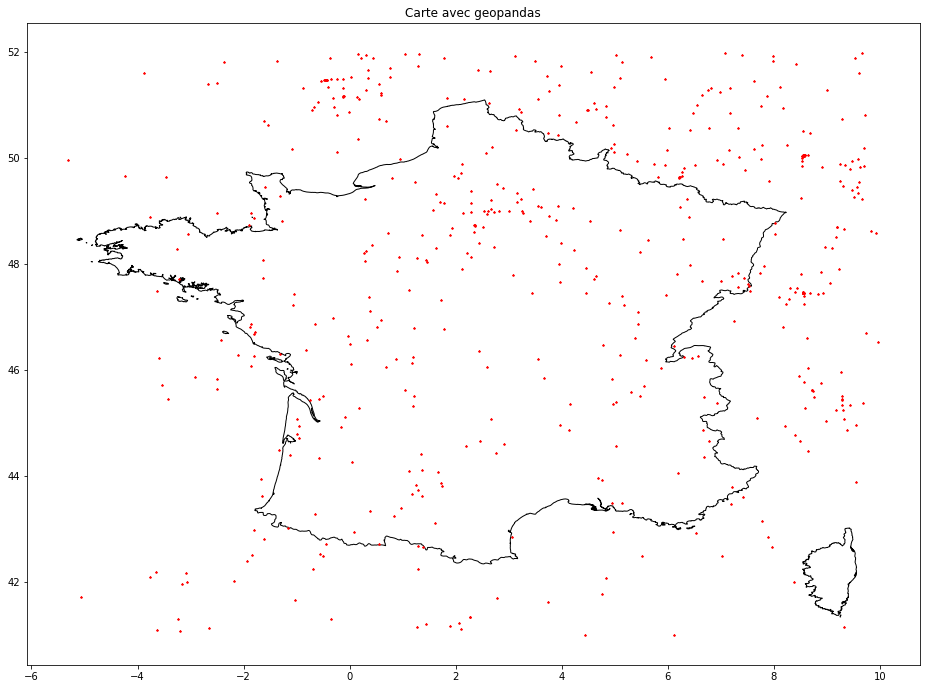

In [39]:
fig, ax = plt.subplots(figsize=(16, 16))
ax.set_aspect('equal')
europe[europe.TZID == 'Europe/Paris'].plot(ax=ax, color='white', edgecolor='black')
gdf.plot(ax=ax, marker='*', color='red', markersize=3)
ax.set_title('Carte avec geopandas');

# Aircraft model

In [87]:
#bboxFrance= [min_latitude, max_latitude, min_longitude, max_latitude]
bboxFrance= [41, 52, -5.5, 10]

import time
from datetime import datetime, timedelta
t = int(time.time())
print(t)
print(datetime.fromtimestamp(t).strftime("%d/%m/%Y %H:%M"))

1554049659
31/03/2019 18:27


In [88]:
#  fly data
datafull =[]
api = OpenSkyApi()
states = api.get_states(time_secs= t, bbox=bboxFrance)
for s in states.states:
    #print("(%r, %r, %r, %r)" % (s.longitude, s.latitude, s.velocity, s.callsign))
    #print(s)
    if s.latitude != None and s.longitude != None:
       #data.append(( s.callsign, float(s.longitude), float(s.latitude) ))
        datafull.append((s.icao24,s.callsign))
    else :
        pass
print(datafull[0:5]) 
print(len(datafull))

[('4b1806', 'SWR64C  '), ('4b1807', 'SWR407  '), ('4b1809', 'SWR225Y '), ('31dd01', 'IC686   '), ('4952c2', 'TAP576  ')]
887


In [89]:
labels= ['icao24','callsign','origin_country','time_position','last_contact','longitude','latidue','geo_altidude','on_ground',
         'velocity','heading','vertical_rate','sensors','baro_altitude','squawk','spi','position_source']

In [91]:
df = pd.DataFrame(datafull,columns =['icao24','callsign'])
df['aircraft_model'] = df['icao24']
df['airlines_icao'] = 'vide'
df['airlines_name'] = 'vide'
df['airlines_country'] = 'vide'
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1806,SWR64C,4b1806,vide,vide,vide
1,4b1807,SWR407,4b1807,vide,vide,vide
2,4b1809,SWR225Y,4b1809,vide,vide,vide
3,31dd01,IC686,31dd01,vide,vide,vide
4,4952c2,TAP576,4952c2,vide,vide,vide


In [92]:
a = df_aircraft.set_index('icao24')['model']
df["aircraft_model"] = df["aircraft_model"].replace(a)

In [93]:
df['airlines_icao'] = df['callsign'].apply(lambda x: x[0:3])

In [100]:
df['airlines_name'] = df['airlines_icao']
df['airlines_country'] = df['airlines_icao']

In [101]:
df.head()

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1806,SWR64C,BD-500-1A11 (CS300),SWR,SWR,SWR
1,4b1807,SWR407,BD-500-1A11 (CS300),SWR,SWR,SWR
2,4b1809,SWR225Y,BD-500-1A11 (CS300),SWR,SWR,SWR
3,31dd01,IC686,31dd01,IC6,IC6,IC6
4,4952c2,TAP576,4952c2,TAP,TAP,TAP


In [97]:
df_airlines = pd.read_csv("data/airlines.dat", names=['ID','Name','Alias','IATA','icao','Callsign','country','active'])
df_airlines.head()

,ID,Name,Alias,IATA,icao,Callsign,country,active
0,-1,Unknown,\N,-,NaN,\N,\N,Y
1,1,Private flight,\N,-,NaN,NaN,NaN,Y
2,2,135 Airways,\N,NaN,GNL,GENERAL,United States,N
3,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
4,4,2 Sqn No 1 Elementary Flying Training School,\N,NaN,WYT,NaN,United Kingdom,N


In [98]:
a = df_airlines.set_index('icao')['Name']
df["airlines_name"] = df["airlines_name"].replace(a)

In [103]:
a = df_airlines.set_index('icao')['country']
df["airlines_country"] = df["airlines_country"].replace(a)


In [104]:
df.head(50)

,icao24,callsign,aircraft_model,airlines_icao,airlines_name,airlines_country
0,4b1806,SWR64C,BD-500-1A11 (CS300),SWR,SWR,Switzerland
1,4b1807,SWR407,BD-500-1A11 (CS300),SWR,SWR,Switzerland
2,4b1809,SWR225Y,BD-500-1A11 (CS300),SWR,SWR,Switzerland
3,31dd01,IC686,31dd01,IC6,IC6,IC6
4,4952c2,TAP576,4952c2,TAP,TAP,Portugal
5,4b180a,SWR271X,4b180a,SWR,SWR,Switzerland
6,3c6666,DLH68X,A321 231,DLH,DLH,Germany
7,3c664d,DLH2VT,A321 131,DLH,DLH,Germany
8,3c6663,DLH65E,A321 231,DLH,DLH,Germany
9,3c6677,DLH275,A321 231,DLH,DLH,Germany


In [105]:
df.aircraft_model.count()

803

In [106]:
df.groupby('aircraft_model').sum()

,icao24,callsign,airlines_icao,airlines_name,airlines_country
aircraft_model,,,,,
02aa3f,02aa3f,GCJZV,GCJ,GCJ,GCJ
06a0e8,06a0e8,QTR096,QTR,QTR,Qatar
1106c0,1106c0,,,,
172N,4b06f4,HBCQM,HBC,HBC,Haiti
172P Skyhawk,3d3432,DESAC,DES,DES,Canada
177RG,a13451,,,,
300472,300472,ISTDI,IST,IST,Turkey
3006fa,3006fa,IRVAG,IRV,IRV,Iran
30074f,30074f,ITIKE,ITI,ITI,ITI


In [159]:
df